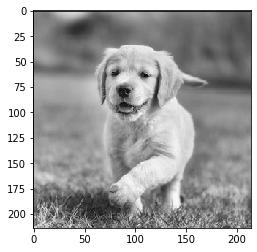

In [1]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
#Load color image from file path
image = cv2.imread('dog.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

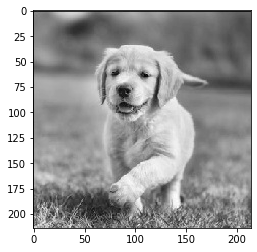

In [2]:
# Converting the image into grayscale using OpenCV
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
# normalize, rescale entries to lie in [0,1]
gray = gray.astype("float32")/255
plt.imshow(gray ,cmap = 'gray')
plt.show()

In [3]:
#Define some filters
#we are creating 3 filters initialized with zeros
l1_filter = np.zeros((4,4,4))
print(l1_filter)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [4]:
#giving values to filters
#horizontal edge detection
l1_filter[0::] = [[-1,-1,1,1],
                  [-1,-1,1,1],
                  [-1,-1,1,1],
                  [-1,-1,1,1]]
#general edge detection
l1_filter[1::] = l1_filter[0] * -1
#vertical edge detection
l1_filter[2::] = l1_filter[1].T
l1_filter[3::] = l1_filter[2] * -1
print(l1_filter[0])

[[-1. -1.  1.  1.]
 [-1. -1.  1.  1.]
 [-1. -1.  1.  1.]
 [-1. -1.  1.  1.]]


In [5]:
#Define a convolutional layer in init function
#define neural network using pytorch
class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    num_filters = 3
    #define convolutional layer with input size, output size and kernel size leaving
    #stride and padding to default values
    #input size is 1 as grayscale image depth is 1
    #output size = num_filters
    self.conv = nn.Conv2d(1, num_filters, kernel_size=(3, 3), bias=False)
    #setting weights
    self.conv.weight = torch.nn.Parameter(weight)
    # define a maxpooling layer of size 2x2 and a stride of 2
    self.pool = nn.MaxPool2d(2, 2)
  #define the feed forward function of the model
  def forward(self, x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    pooled_x = self.pool(activated_x)
    # returns all layers
    return conv_x, activated_x, pooled_x
#instantiate the model and setting the weights to be those from our pre- defined filters
weight = torch.from_numpy(l1_filter).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)

Net(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


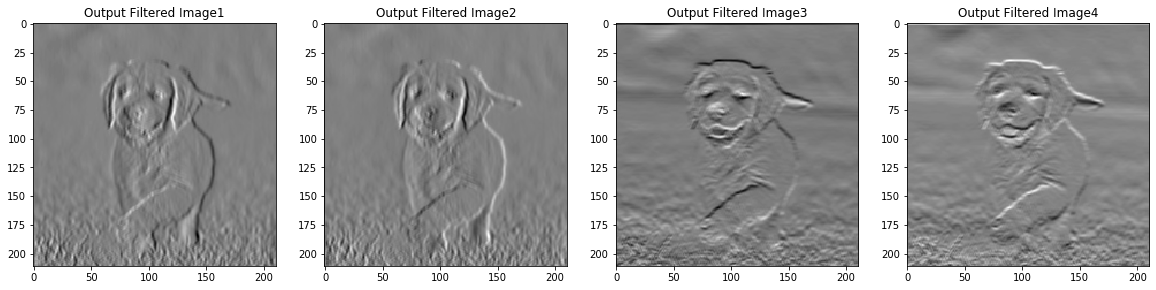

In [7]:

#function for plotting filters
def plot_filters(filters):
    n_filters = len(filters)
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))
#function to visualize layers
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        axis = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        axis.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        axis.set_title('Output Filtered Image%s' % str(i+1))
# convert the grayscale image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)
# get all the layers from the forward function of our model
# with a call to `model(input)`
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)
# visualize the output of the convolutional layer
viz_layer(conv_layer)